In [7]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt
from scipy.special import hermite
from scipy.integrate import quad

In [10]:
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units
x_0 = 1.
omega = hbar / (2 * m * x_0**2)
Nmax = 200  # Maximum Fock state to consider


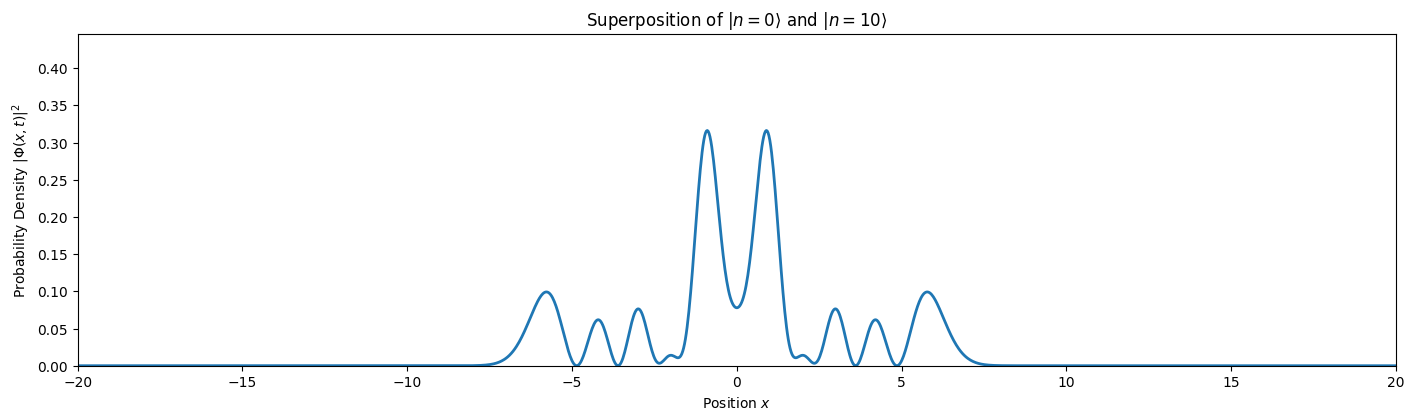

In [11]:
from scipy.special import factorial
from matplotlib.animation import FuncAnimation, PillowWriter


##define psi_n by recurrence and this time return all elements
def psi_n_whole(x, n, x_0=1.0):
    psin = []
    
    # Initialize psi_{0} and psi_{1}
    psi_0 = (np.exp(-x**2 / (4 * x_0**2))/ (2 * np.pi * x_0**2)**0.25)  # Psi_0(x)
    psi_1 = x * psi_0 / x_0  # Psi_1(x)
    psin.append(psi_0)
    psin.append(psi_1)
    # Calculate psi_n(x) for 1 <= n <= desired n using recurrence relation
    for i in range(1, n):
        psi_next = (x * psin[i] / x_0  - np.sqrt(i) * psin[i-1]) / np.sqrt(i+1)
        psin.append(psi_next)
    
    # Return complete psi_n
    return psin

x_vals = np.linspace(-20 * x_0, 20 * x_0, 1500)  # Position space range
time_steps = 600  # Number of time steps for the animation
total_time = 20.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration

##-------------------## Changer les valeurs de la norme et la superpostion ici ##-------------------#
# Définir les coefficients de superposition
def phi_n_superposition(Nmax):
    norm = 1 / np.sqrt(2)
    coeffs = np.zeros(Nmax + 1, dtype=complex)  # Initialisation correcte des coefficients
    coeffs[0] = 1
    coeffs[10] = 1  # On prend n = 10 (et non 11)
    coeffs = coeffs * norm  # Normaliser
    return coeffs

# Pré-calculer psi_n (supposons que psi_n_whole est déjà défini)
psi_n_values = np.array(psi_n_whole(x_vals, Nmax))

# Calculer les coefficients de la superposition
phi_n_coeffs_arr_superposition = phi_n_superposition(Nmax=Nmax)

# Calculer le tableau des exponentielles pour l'évolution temporelle
exponentials = np.exp(
    -1j * omega * np.outer(np.arange(Nmax + 1), np.linspace(0, total_time, time_steps))
)

# Pré-calculer l'évolution temporelle de Φ(x, t) en utilisant Eq. (76)
phi_x_t_superposition = (
    (psi_n_values[:, :, np.newaxis] * exponentials[:, np.newaxis, :] * phi_n_coeffs_arr_superposition[:, np.newaxis, np.newaxis])
).sum(axis=0)

# Créer la figure et l'axe pour l'animation
fig, ax = plt.subplots(1, 1, figsize=(15, 5))  # Un seul sous-graphique

plt.tight_layout(pad=5.0)

# Ajuster les limites et les labels pour l'axe
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0, np.max(np.abs(phi_x_t_superposition) ** 2))
ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
ax.set_xlabel("Position $x$")
ax.set_title(r"Superposition of $|n=0\rangle$ and $|n=10\rangle$")

# Créer la ligne de graphique
line, = ax.plot([], [], lw=2)

# Fonction d'animation
def animate(i):
    line.set_data(x_vals, np.abs(phi_x_t_superposition[:, i]) ** 2)
    return line,

# Créer l'animation
ani = FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

# Sauvegarder comme MP4
ani.save("wavepacket_evolution_superposition.mp4", writer="ffmpeg", fps=30)

plt.show()
